<a href="https://colab.research.google.com/github/Raanank10/Instagram-s-influencers/blob/Eladk_20220324/Instagram_Influencers_V4_New_Data_MAR_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Instagram_influencers**

# Global Parameters

In [510]:
path_part0 = 'https://raw.githubusercontent.com/Raanank10/Instagram-s-influencers/main/ai_posts_analysis_data.xlsx'
fname = 'ai_posts_analysis_data.xlsx'

path_part1= 'https://raw.githubusercontent.com/Raanank10/Instagram-s-influencers/main/project_part1.csv'
path_part2= 'https://raw.githubusercontent.com/Raanank10/Instagram-s-influencers/main/project_part2.csv'



# path_part3= 'project (1).csv'
# path_part4= 'project (4).csv'

train_size = 0.75
rand_state = 345
sigma = 3
Min_followers = 500

# Bining
bin_labels=['Low','Medium','High', 'Very High','Extreme']

In [511]:
path_part1_1= 'https://raw.githubusercontent.com/Raanank10/Instagram-s-influencers/main/project_1_jan22_part_1.csv'
path_part1_2= 'https://raw.githubusercontent.com/Raanank10/Instagram-s-influencers/main/project_1_jan22_part_2.csv'

In [512]:
path_part4_1= 'https://raw.githubusercontent.com/Raanank10/Instagram-s-influencers/main/project_4_jan22_part_1.csv'
path_part4_2= 'https://raw.githubusercontent.com/Raanank10/Instagram-s-influencers/main/project_4_jan22_part_2.csv'
path_part4_3= 'https://raw.githubusercontent.com/Raanank10/Instagram-s-influencers/main/project_4_jan22_part_3.csv'
path_part4_4= 'https://raw.githubusercontent.com/Raanank10/Instagram-s-influencers/main/project_4_jan22_part_4.csv'

In [513]:
def what_is_better(diff, percent = None):
  if not percent:
    percent = 10
  if diff > percent:
    res = 1
  elif diff < -1 * percent:
    res = -1
  elif (diff < percent or diff > percent):
    res = 0
  else:
    res = np.NaN
  return res

In [514]:
# Run the code to install DataPrep
!pip install dataprep
!pip install category_encoders

In [515]:
# General Tools
import numpy as np
import scipy as sp
import pandas as pd
import missingno as msno
import xgboost as xgb
import datetime

# SK Learn
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import neighbors
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MaxAbsScaler, MinMaxScaler, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score , confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report # elad 20210708
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif, VarianceThreshold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.preprocessing import OrdinalEncoder # elad 20210911
import category_encoders as ce # elad 20220218

# Trees Visualization
import pydot
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO

# For scoring
from sklearn.metrics import mean_squared_log_error as msle
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

# Misc
import warnings
from sys import modules
from time import time
from platform import python_version
from google.colab import files

# Visualization
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go

# IPython
from IPython.display import Image, display

# Confuguration
warnings.filterwarnings('ignore')
%matplotlib inline

# EDA prep
from dataprep.eda import plot, plot_correlation, plot_missing, create_report


# Pipeline 1 Get the Data

Concate the 3 files

In [516]:
df_part0 = pd.read_csv(path_part0, index_col=0)
df_part1 = pd.read_csv(path_part1, index_col=0)
df_part2 = pd.read_csv(path_part2, index_col=0)

In [517]:
df_path_part1_1 = pd.read_csv(path_part1_1, index_col=0)
df_path_part1_1.dropna(how='all',inplace=True)
print('path_part1_1 shape=',(df_path_part1_1.shape))
df_path_part1_2 = pd.read_csv(path_part1_2, index_col=0)
df_path_part1_2.dropna(how='all',inplace=True)
print('path_part1_2 shape=',(df_path_part1_2.shape))
df_part3 = pd.concat([df_path_part1_1, df_path_part1_2])
print('df_part3 shape=',(df_part3.shape))

df_part3['DATA_SOURCE'] = 'Project 1'

path_part1_1 shape= (18082, 26)
path_part1_2 shape= (17975, 26)
df_part3 shape= (36057, 26)


In [518]:
df_part3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36057 entries, 1918 to 37974
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   USERID                          36057 non-null  int64  
 1   USERNAME                        36057 non-null  object 
 2   FULLNAME                        34823 non-null  object 
 3   FOLLOWER                        36057 non-null  int64  
 4   POST ID                         36057 non-null  float64
 5   SHORTCODE                       36057 non-null  object 
 6   LIKES                           36057 non-null  int64  
 7   COMMENTS                        36057 non-null  int64  
 8   ENGAGEMENT                      36057 non-null  float64
 9   URL                             36057 non-null  object 
 10  ACCESSIBILITY CAPTION           29782 non-null  object 
 11  CAPTION                         30476 non-null  object 
 12  LOCATION                     

eladk 10-Jan-2022

In [519]:
df_path_part4_1 = pd.read_csv(path_part4_1, index_col=0)
df_path_part4_1.dropna(how='all',inplace=True)
print('df_path_part4_1 shape=',(df_path_part4_1.shape))

df_path_part4_2 = pd.read_csv(path_part4_2, index_col=0)
df_path_part4_2.dropna(how='all',inplace=True)
print('path_part4_2 shape=',(df_path_part4_2.shape))

df_path_part4_3 = pd.read_csv(path_part4_3, index_col=0)
df_path_part4_3.dropna(how='all',inplace=True)
print('path_part4_3 shape=',(df_path_part4_3.shape))


df_path_part4_4 = pd.read_csv(path_part4_4, index_col=0)
df_path_part4_4.dropna(how='all',inplace=True)
print('path_part4_4 shape=',(df_path_part4_4.shape))

df_part4 = pd.concat([df_path_part4_1, df_path_part4_2, df_path_part4_3, df_path_part4_4])

df_part4['DATA_SOURCE'] = 'Project 4'

print('df_part4 shape=',(df_part4.shape))

df_path_part4_1 shape= (15104, 37)
path_part4_2 shape= (20000, 37)
path_part4_3 shape= (20000, 37)
path_part4_4 shape= (2817, 37)
df_part4 shape= (57921, 38)


In [520]:
print('df_part4 len=',len(df_part3.columns))
print('df_part4 len=',len(df_part4.columns))

df_part4 len= 27
df_part4 len= 38


In [521]:
df_part4_USER_BIO = df_part4[['Post Image',	'User Bio',	'User bio interest',	'User Country',	'Audience Interest',	'User gender',	'User Age',	'Verified?',	'User Interests',	'User City',	'User Category']]

In [522]:
print('df_part4 len=',len(df_part3.columns))
print('df_part4 len=',len(df_part4.columns))
print('df_part4_USER_BIO len=',len(df_part4_USER_BIO.columns))

df_part4 len= 27
df_part4 len= 38
df_part4_USER_BIO len= 11


In [523]:
df_part4 = df_part4.drop(columns=['Post Image',	'User Bio',	'User bio interest',	'User Country',	'Audience Interest',	'User gender',	'User Age',	'Verified?',	'User Interests',	'User City',	'User Category'])

In [524]:
print('df_part4 len=',len(df_part3.columns))
print('df_part4 len=',len(df_part4.columns))
print('df_part4_USER_BIO len=',len(df_part4_USER_BIO.columns))

df_part4 len= 27
df_part4 len= 27
df_part4_USER_BIO len= 11


In [525]:
df = pd.concat([df_part3, df_part4])
print(f'data len After concat all 3 parts = {len(df)}')

data len After concat all 3 parts = 93978


In [526]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 93978 entries, 1918.0 to 62816.0
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   USERID                          93978 non-null  float64
 1   USERNAME                        93978 non-null  object 
 2   FULLNAME                        90672 non-null  object 
 3   FOLLOWER                        93978 non-null  float64
 4   POST ID                         93978 non-null  float64
 5   SHORTCODE                       93978 non-null  object 
 6   LIKES                           93978 non-null  float64
 7   COMMENTS                        93978 non-null  float64
 8   ENGAGEMENT                      93978 non-null  float64
 9   URL                             93978 non-null  object 
 10  ACCESSIBILITY CAPTION           73755 non-null  object 
 11  CAPTION                         77446 non-null  object 
 12  LOCATION               

In [527]:
# df.to_csv('data_output_PL1.csv') 
# files.download('data_output_PL1.csv')

# Pipeline 2 Data processing and Feature Engineering

## Data processing

In [528]:
print(f'Number of Duplicate Rows = {len(df[df.index.duplicated()])}')
df = df[~df.index.duplicated()]

Number of Duplicate Rows = 32412


In [529]:
print(f'Number of row of influencers with less than \
{Min_followers} followers = {len(df[df.FOLLOWER < Min_followers])}')

print(f'Number of row of influencers with more than \
{Min_followers} followers = {len(df[df.FOLLOWER > Min_followers])}')

df = df[df.FOLLOWER >= Min_followers]


Number of row of influencers with less than 500 followers = 22800
Number of row of influencers with more than 500 followers = 38706


### Remove Unnecessary Columns

Remove unnecessary columns from Dataframe, should be done in X

In [530]:
df.drop(['POST ID','VIDEO URL','SHORTCODE','IMAGE URL','FULLNAME','USERID',\
         'URL','VIDEO VIEW COUNT','URL'], inplace=True, axis=1)

Remove column that all values are unique:

In [531]:
for col in df.columns:
    if len(df[col].unique()) == len(df):
        print(col)
        #df.drop(col,inplace=True,axis=1)

df_original is holding the original data without any changes but droping unused columns and duplicates  

In [532]:
df_original = df.copy()

In [533]:
df.columns = df.columns.str.replace(' ', '_')

In [534]:
df = df[df['ENGAGEMENT'].notna()]
df = df[df['LIKES'].notna()]
df = df[df['COMMENTS'].notna()]
print(f'After remove lines with no data on ENGAGEMENT, LIKES, COMMENTS = {len(df)}')

After remove lines with no data on ENGAGEMENT, LIKES, COMMENTS = 38766


# Pipeline 3 Feature Engineering

Create Log columns (likes, comments and engagement) for prediction 

In [535]:
df['log_ENGAGEMENT'] = np.log10(df.ENGAGEMENT+0.0001)
df['log_LIKES'] = np.log10(df.LIKES+0.0001)
df['log_COMMENTS'] = np.log10(df.COMMENTS+0.0001)

In [536]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 38766 entries, 1918.0 to 62808.0
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   USERNAME                        38766 non-null  object 
 1   FOLLOWER                        38766 non-null  float64
 2   LIKES                           38766 non-null  float64
 3   COMMENTS                        38766 non-null  float64
 4   ENGAGEMENT                      38766 non-null  float64
 5   ACCESSIBILITY_CAPTION           30274 non-null  object 
 6   CAPTION                         35798 non-null  object 
 7   LOCATION                        13585 non-null  object 
 8   CITY                            12148 non-null  object 
 9   COUNTRY                         10894 non-null  object 
 10  TIME                            38766 non-null  float64
 11  IMAGE_LABELS                    38747 non-null  object 
 12  CAPTION_INTEREST       

Process Image Labels Column to dummies columns

In [305]:
df.IMAGE_LABELS = df.IMAGE_LABELS.str.replace(' ', '')
df['IMAGE_LABELS'] = df['IMAGE_LABELS'].str.upper()

split image lables based on first data analysis:

In [ ]:
# df_image_labels_dummies = df['IMAGE_LABELS'].str.get_dummies(sep=',')

In [306]:
# df_image_labels_dummies_style = df_image_labels_dummies[['HUMAN','FOOTWEAR','FACE','FEMALE','SMILE','SWIMWEAR','FINGER',
#                                                          'SLEEVE','EVENINGDRESS','HEAD','JEWELRY','WOMAN','TEXT','SKIN',
#                                                          'APPAREL','HAT','PHOTO','FASHION','POSTER','UNDERWEAR']]

In [307]:
# #df_with_dummies 
# df = pd.concat([df, df_image_labels_dummies_style], axis=1)

split image lables on all labels, eladl 24-Mar-2022

In [ ]:
df_image_labels_all = df['IMAGE_LABELS'].str.get_dummies(sep=',')

In [502]:
df_image_labels_dummies.columns

Index(['ABIES', 'ABSINTHE', 'ABYSSINIAN', 'ACANTHACEAE', 'ACCESSORIES',
       'ACCESSORY', 'ACCIPITER', 'ACCORDION', 'ACORN', 'ACROBATIC',
       ...
       'YARD', 'YARN', 'YEW', 'YOGA', 'YOGURT', 'ZEBRA', 'ZEBRACROSSING',
       'ZIPPER', 'ZOO', 'ZUCCHINI'],
      dtype='object', length=2350)

In [505]:
series_of_lable_and_count_of_values = (df_image_labels_dummies.apply(lambda col: col.sum()).sort_values(ascending=False))

In [506]:
series_of_lable_and_count_of_values.head(20)

HUMAN          29415
PERSON         29415
CLOTHING       20812
APPAREL        20812
FACE           14411
FEMALE         12647
PHOTOGRAPHY    11050
PHOTO          11050
PORTRAIT        9836
WOMAN           7561
GIRL            7468
PLANT           7301
PEOPLE          7129
OUTDOORS        6689
FOOTWEAR        5448
ACCESSORY       5280
ACCESSORIES     5280
SHOE            5182
TEXT            5132
FURNITURE       5084
dtype: int64

In [508]:
series_of_lable_and_count_of_values.head(20).index

Index(['HUMAN', 'PERSON', 'CLOTHING', 'APPAREL', 'FACE', 'FEMALE',
       'PHOTOGRAPHY', 'PHOTO', 'PORTRAIT', 'WOMAN', 'GIRL', 'PLANT', 'PEOPLE',
       'OUTDOORS', 'FOOTWEAR', 'ACCESSORY', 'ACCESSORIES', 'SHOE', 'TEXT',
       'FURNITURE'],
      dtype='object')

In [ ]:
df_image_labels_dummies_top_20 = series_of_lable_and_count_of_values.head(20).index

In [ ]:
#df_with_dummies 
df = pd.concat([df, df_image_labels_dummies_top_20], axis=1)

In [509]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38766 entries, 0 to 38765
Data columns (total 88 columns):
 #   Column                                               Non-Null Count  Dtype         
---  ------                                               --------------  -----         
 0   FOLLOWER                                             38766 non-null  float64       
 1   LIKES                                                38766 non-null  float64       
 2   COMMENTS                                             38766 non-null  float64       
 3   ENGAGEMENT                                           38766 non-null  float64       
 4   ACCESSIBILITY_CAPTION                                38766 non-null  object        
 5   CAPTION                                              38766 non-null  object        
 6   LOCATION                                             38766 non-null  object        
 7   CITY                                                 38766 non-null  object        
 

Create Mean columns for likes, comments, engagement

In [308]:
df.groupby('USERNAME')['LIKES'].mean().sample(5)
#df.groupby('USERNAME')['LIKES'].mean().plot.hist()

USERNAME
viniciusftv                   7816.916667
melwilson_journo                61.166667
tomasz_radziszewicz_trener      40.000000
pettusmediaproductionsllc       24.000000
ae.letters                      46.166667
Name: LIKES, dtype: float64

In [309]:
df.groupby('USERNAME')['LIKES'].size().sample(5)
#df.groupby('USERNAME')['LIKES'].size().plot.hist()

USERNAME
studiomartinbergstrom    12
marcoluque               12
millliemooo              12
gdl_capital              12
bitesizedessentials      12
Name: LIKES, dtype: int64

In [310]:
mean_likes = df.groupby('USERNAME')['LIKES'].mean()
count_of_posts_by_username = df.groupby('USERNAME').size()
mean_comments = df.groupby('USERNAME')['COMMENTS'].mean()
mean_engagement = df.groupby('USERNAME')['ENGAGEMENT'].mean()

df = df.set_index(['USERNAME']) # make the same index here
df_original = df_original.set_index(['USERNAME']) # make the same index here

df['mean_likes'] = mean_likes
df_original['mean_likes'] = mean_likes

df['count_of_posts_by_username'] = count_of_posts_by_username
df_original['count_of_posts_by_username'] = count_of_posts_by_username

df['mean_comments'] = mean_comments
df_original['mean_comments'] = mean_comments

df = df.reset_index()
df_original = df_original.reset_index()

In [311]:
df_original = df_original.rename_axis('LINE_NUM_INDEX')

Create Date and Time Features from DATETIME unix time column

In [312]:
df['DATETIME'] = pd.to_datetime(df['TIME'],unit='s')
df['YEAR'] = pd.DatetimeIndex(df['DATETIME']).year
df['MONTH'] = pd.DatetimeIndex(df['DATETIME']).month
df['DAY'] = pd.DatetimeIndex(df['DATETIME']).day
df['DAYOFWEEK'] = pd.DatetimeIndex(df['DATETIME']).dayofweek
df['HOUR'] = pd.DatetimeIndex(df['DATETIME']).hour
df['MINUTE'] = pd.DatetimeIndex(df['DATETIME']).minute

In [313]:
df.drop(['USERNAME','TIME'], axis=1, inplace=True)

In [314]:
df['COMMENT_DISABLED'] = df['COMMENT_DISABLED'].map(dict(yes=1, no=0))
df['IS_VIDEO'] = df['IS_VIDEO'].map(dict(yes=1, no=0))
df['HAS_AUDIO'] = df['HAS_AUDIO'].map(dict(yes=1, no=0))

In [315]:
df = df.rename_axis('LINE_NUM_INDEX')

Replace NaN with Null, this is prerequisite for Caption text analysis

In [316]:
for col in df.columns:
    if len(df[df[col].isnull()]) > 0:
      df[col] = df[col].fillna('Null')
      print(col)

ACCESSIBILITY_CAPTION
CAPTION
LOCATION
CITY
COUNTRY
IMAGE_LABELS
CAPTION_INTEREST
ACCESSIBILITY_CAPTION_INTEREST
IMAGE_LABEL_INTEREST


Feature Engineering Based on Caption text analysis

In [317]:
df['NUMBER_OF_WORDS_IN_CAPTION'] = [len(x.split()) for x in df['CAPTION'].tolist()]
df['NUMBER_OF_EXCLAMATION_MARK_IN_CAPTION'] = df['CAPTION'].map(lambda x: x.count("!"))
df['NUMBER_OF_QUESTION_MARK_IN_CAPTION'] = df['CAPTION'].map(lambda x: x.count("?"))
df['NUMBER_OF_HASH_IN_CAPTION'] = df['CAPTION'].map(lambda x: x.count("#"))
df['NUMBER_OF_AT_IN_CAPTION'] = df['CAPTION'].map(lambda x: x.count("@"))
df['NUMBER_OF_COMMA_IN_CAPTION'] = df['CAPTION'].map(lambda x: x.count(","))

Feature Engineering Based on Accessibility Caption text analysis

In [318]:
df['NUMBER_OF_WORDS_IN_ACCESSIBILITY_CAPTIONN'] = [len(x.split()) for x in df['ACCESSIBILITY_CAPTION'].tolist()]
df['NUMBER_OF_EXCLAMATION_MARK_IN_ACCESSIBILITY_CAPTION'] = df['ACCESSIBILITY_CAPTION'].map(lambda x: x.count("!"))
df['NUMBER_OF_QUESTION_MARK_IN_ACCESSIBILITY_CAPTION'] = df['ACCESSIBILITY_CAPTION'].map(lambda x: x.count("?"))
df['NUMBER_OF_HASH_IN_ACCESSIBILITY_CAPTION'] = df['ACCESSIBILITY_CAPTION'].map(lambda x: x.count("#"))
df['NUMBER_OF_AT_IN_ACCESSIBILITY_CAPTION'] = df['ACCESSIBILITY_CAPTION'].map(lambda x: x.count("@"))
df['NUMBER_OF_COMMA_IN_ACCESSIBILITY_CAPTION'] = df['ACCESSIBILITY_CAPTION'].map(lambda x: x.count(","))

Create Binning of Likes, Comments, Engagement

In [319]:
map_dict_rank = {'Low':0.0 , 'Medium':1.0, 'High':2.0, 'Very High':3.0, 'Extreme':4.0}
map_dict_rank


{'Extreme': 4.0, 'High': 2.0, 'Low': 0.0, 'Medium': 1.0, 'Very High': 3.0}

In [320]:
df['LIKES_RANK'] = pd.cut(x=df.log_LIKES,  bins=5, labels=bin_labels, ordered=True)
df['COMMENTS_RANK'] = pd.cut(x=df.log_COMMENTS,  bins=5, labels=bin_labels, ordered=True)
df['ENGAGEMENT_RANK'] = pd.cut(x=df.log_ENGAGEMENT,  bins=5, labels=bin_labels, ordered=True)

In [321]:
df['LIKES_RANK_INT'] =  df['LIKES_RANK'].map(map_dict_rank).astype(int)
df['COMMENTS_RANK_INT'] =   df['COMMENTS_RANK'].map(map_dict_rank).astype(int)
df['ENGAGEMENT_RANK_INT'] =   df['ENGAGEMENT_RANK'].map(map_dict_rank).astype(int)

## Encoder category columns (convert to char)

### OrdinalEncoder

In [322]:
enc = OrdinalEncoder()

In [323]:
for col in df.select_dtypes(include=['object']).dtypes.index:
  enc.fit(df[[col]])
  df[col + '_OBJECT_AS_INT'] = enc.transform(df[[col]])

In [324]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38766 entries, 0 to 38765
Data columns (total 78 columns):
 #   Column                                               Non-Null Count  Dtype         
---  ------                                               --------------  -----         
 0   FOLLOWER                                             38766 non-null  float64       
 1   LIKES                                                38766 non-null  float64       
 2   COMMENTS                                             38766 non-null  float64       
 3   ENGAGEMENT                                           38766 non-null  float64       
 4   ACCESSIBILITY_CAPTION                                38766 non-null  object        
 5   CAPTION                                              38766 non-null  object        
 6   LOCATION                                             38766 non-null  object        
 7   CITY                                                 38766 non-null  object        
 

## Target encoding

```
# Edded by Eladk 20122-Feb-18 , based on: https://pbpython.com/categorical-encoding.html
```




In [325]:
df.select_dtypes(include=['object']).apply(lambda col: len(col.unique())).sort_values(ascending=False).head(10)

IMAGE_LABELS                      37408
CAPTION                           33875
ACCESSIBILITY_CAPTION             29372
LOCATION                           6032
CITY                               2754
COUNTRY                             130
CAPTION_INTEREST                     37
IMAGE_LABEL_INTEREST                 36
ACCESSIBILITY_CAPTION_INTEREST       32
DATA_SOURCE                           2
dtype: int64

In [326]:
df.select_dtypes(include=['object']).apply(lambda col: len(col.unique())).sort_values(ascending=True).head(20)

DATA_SOURCE                           2
ACCESSIBILITY_CAPTION_INTEREST       32
IMAGE_LABEL_INTEREST                 36
CAPTION_INTEREST                     37
COUNTRY                             130
CITY                               2754
LOCATION                           6032
ACCESSIBILITY_CAPTION             29372
CAPTION                           33875
IMAGE_LABELS                      37408
dtype: int64

In [327]:
list_columns_to_encode = [col for col in df.select_dtypes(include=['object']).dtypes.index]
list_columns_to_encode

['ACCESSIBILITY_CAPTION',
 'CAPTION',
 'LOCATION',
 'CITY',
 'COUNTRY',
 'IMAGE_LABELS',
 'CAPTION_INTEREST',
 'ACCESSIBILITY_CAPTION_INTEREST',
 'IMAGE_LABEL_INTEREST',
 'DATA_SOURCE']

In [328]:
encoder = ce.TargetEncoder(cols=list_columns_to_encode, smoothing=0, return_df=True)

df_after_target_encoder = encoder.fit_transform(df[list_columns_to_encode], df['log_ENGAGEMENT']) # inplace encoder

df_after_target_encoder = df_after_target_encoder.add_suffix('_after_trgt_encdr')

df_after_target_encoder

df = pd.concat([df, df_after_target_encoder], axis=1, join="inner")

In [329]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38766 entries, 0 to 38765
Data columns (total 88 columns):
 #   Column                                               Non-Null Count  Dtype         
---  ------                                               --------------  -----         
 0   FOLLOWER                                             38766 non-null  float64       
 1   LIKES                                                38766 non-null  float64       
 2   COMMENTS                                             38766 non-null  float64       
 3   ENGAGEMENT                                           38766 non-null  float64       
 4   ACCESSIBILITY_CAPTION                                38766 non-null  object        
 5   CAPTION                                              38766 non-null  object        
 6   LOCATION                                             38766 non-null  object        
 7   CITY                                                 38766 non-null  object        
 

# Pipeline 4 Feature Selection: Variance, SelectKBest

Add by Eladk 20220111

## Variance

In [330]:
from sklearn.feature_selection import VarianceThreshold

In [331]:
# selector = VarianceThreshold(0.05)
# selector.fit(
#              df[(df['IS_VIDEO'] == 0) & (df['IMAGE_LABEL_INTEREST'] == 'style_fashion')].select_dtypes(include=['number']))

# selector.get_support()

list of columns under variance threshold:

In [332]:
#df_image_style.select_dtypes(include=['number']).columns[~selector.get_support()]

In [333]:
# df_image_style.JEWELRY.value_counts()
# df_image_style.POSTER.value_counts()
# df_image_style.UNDERWEAR.value_counts()
#df_image_style.NUMBER_OF_EXCLAMATION_MARK_IN_ACCESSIBILITY_CAPTION.value_counts()
#df_image_style.IMAGE_LABEL_INTEREST_OBJECT_AS_INT.value_counts()

## SelectKBest

In [334]:
from sklearn.feature_selection import SelectKBest

In [335]:
#kbest_selector = SelectKBest(score_func=f_classif, k = 6)

In [336]:
# X_reduced = \
#     pd.DataFrame(kbest_selector.fit_transform(X, y1), 
#                  columns=X.columns[kbest_selector.get_support()].values)
# X_reduced.head()

# #X_reduced.columns

In [337]:
# for ii, colLabel in enumerate(X.columns):
#   print(f'Feature Name:   {colLabel:11}, Feature Score: {kbest_selector.scores_[ii]:08.3f}')

In [338]:
# #<!  This is a way to have a summary of all methods
# numFeatures   = 9
# vMethods      = [chi2, f_classif, mutual_info_classif]
# vMethodsSring = ['Chi 2', 'ANOVA F Value', 'Mutual Informatiom']

# mMutualSelection = np.zeros((len(vMethods), X.shape[1]), dtype=bool)

# for ii, iMethod in enumerate(vMethods):
#   mMutualSelection[ii, :] = kbest_selector(score_func=iMethod, k = numFeatures).fit(X, y1).get_support()

# dfMutualSelection = pd.DataFrame(data = mMutualSelection, index = vMethodsSring, columns = X.columns, copy = True)
# dfMutualSelection.index.name = 'Method'

# dfMutualSelection

# Pipeline 5 Split the Data and Model Selection

## Spliting the Data

seperate the row data

In [339]:
df_video = df[df['IS_VIDEO']==1]
df_image = df[df['IS_VIDEO'] == 0]
df_image_style = df_image[df_image['IMAGE_LABEL_INTEREST'] == 'style_fashion']

Separate X, y

In [340]:
X = df_image_style.select_dtypes(include=['number'])
X.drop(['LIKES','COMMENTS','ENGAGEMENT','mean_likes','mean_comments',\
        'log_ENGAGEMENT','log_LIKES','log_COMMENTS'], axis=1, inplace=True)
X.drop(['LIKES_RANK_INT','COMMENTS_RANK_INT','ENGAGEMENT_RANK_INT'], axis=1, inplace=True)

In [341]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14394 entries, 1 to 38765
Data columns (total 63 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   FOLLOWER                                             14394 non-null  float64
 1   COMMENT_DISABLED                                     14394 non-null  int64  
 2   IS_VIDEO                                             14394 non-null  int64  
 3   HAS_AUDIO                                            14394 non-null  int64  
 4   HUMAN                                                14394 non-null  int64  
 5   FOOTWEAR                                             14394 non-null  int64  
 6   FACE                                                 14394 non-null  int64  
 7   FEMALE                                               14394 non-null  int64  
 8   SMILE                                                14394 non-nul

In [342]:
y1 = df_image_style['log_LIKES']
y2 = df_image_style['log_COMMENTS']
y3 = df_image_style['log_ENGAGEMENT']
y4 = df_image_style['log_LIKES'] / df_image_style['FOLLOWER']

Spilt Train and Test

In [343]:
X_train, X_test, y_train, y_test = train_test_split(X, y1, train_size = train_size\
                           , random_state = rand_state)#, stratify = df.ENGAGEMENT)

In [344]:
# X_train, X_test, y_train, y_test = train_test_split(X, y4, train_size = train_size\
#                            , random_state = rand_state)#, stratify = df.ENGAGEMENT)

In [345]:
print('Training Features Shape:', X_train.shape)
print('Training Labels (y) Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels(y) Shape:', y_test.shape)

Training Features Shape: (10795, 63)
Training Labels (y) Shape: (10795,)
Testing Features Shape: (3599, 63)
Testing Labels(y) Shape: (3599,)


## XGBoost Likes and Comments Prediction

In [346]:
XGB_reg_likes = xgb.XGBRegressor(
colsample_bytree= 1, max_depth= 2, n_estimators= 200
)

In [347]:
# XGB_param_grid = {'colsample_bytree': [0.3, 0.7, 1.0, 1.2],
#     'n_estimators': [50,100,200],    'max_depth': [2,3,4]
# }
# XGB_reg_grid = xgb.XGBRegressor()
# grid_mse = GridSearchCV(param_grid=XGB_param_grid, estimator=XGB_reg_grid, 
#                         scoring='neg_mean_squared_error', cv=4, verbose=1)
# grid_mse.fit(X, y1)
# # Print the best parameters and lowest RMSE
# print("Best parameters found: ", grid_mse.best_params_)
# print("Lowest RMSE found: ", np.sqrt(np.abs(grid_mse.best_score_)))

In [348]:
XGB_reg_likes.fit(X_train, y_train)

[11:12:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(max_depth=2, n_estimators=200)

Evaluate the model

In [349]:
score = XGB_reg_likes.score(X_train, y_train)  
print("Training score: ", score)

Training score:  0.8388693166995915


In [350]:
# scores = cross_val_score(XGB_reg_likes, X_train, y_train,cv=10)
# print("Mean cross-validation score: %.2f" % scores.mean())

In [351]:
y_test_pred= XGB_reg_likes.predict(X_test)
#X_test_copy['y_test_pred'] = XGB_reg_likes.predict(X_test)

mse_XGB = mse(10**y_test, 10**y_test_pred , squared=False)

score_test = XGB_reg_likes.score(X_test,y_test_pred)  

print("test score: ", round(score_test,2))
print("MSE: %.2f" % mse_XGB)
print("RMSE unlog: %.2f" % (mse_XGB**0.5))

print('RMSE by likes after XGBoost model', round(mse_XGB,2))

test score:  1.0
MSE: 102899.74
RMSE unlog: 320.78
RMSE by likes after XGBoost model 102899.74


test score:  1.0 <br>
MSE: 104551.90 <br>
RMSE: 323.34 <br>
RMSE by likes after XGBoost model 104551.9



In [352]:
X_test.head()

FOLLOWER  COMMENT_DISABLED  IS_VIDEO  HAS_AUDIO  HUMAN  \
LINE_NUM_INDEX                                                           
37408           531866.0                 0         0          0      1   
15925             3168.0                 0         0          0      1   
5264            179467.0                 0         0          0      1   
750               1739.0                 0         0          0      1   
36480           140784.0                 0         0          0      1   

                FOOTWEAR  FACE  FEMALE  SMILE  SWIMWEAR  ...  \
LINE_NUM_INDEX                                           ...   
37408                  0     0       1      0         0  ...   
15925                  0     1       1      0         0  ...   
5264                   1     1       1      0         0  ...   
750                    0     0       1      0         0  ...   
36480                  0     1       1      0         0  ...   

                ACCESSIBILITY_CAPTION_after_trgt_encdr  \
LINE_NUM_INDEX                                           
37408                                          0.36754   
15925                                          0.36754   
5264                                           0.36754   
750                                            0.36754   
36480                                          0.36754   

                CAPTION_after_trgt_encdr  LOCATION_after_trgt_encdr  \
LINE_NUM_INDEX                                                        
37408                            0.36754                   0.322829   
15925                            0.36754                   0.367797   
5264                            -0.35540                   0.363596   
750                              0.36754                   0.322829   
36480                            0.36754                  -0.131344   

                CITY_after_trgt_encdr  COUNTRY_after_trgt_encdr  \
LINE_NUM_INDEX                                                    
37408                        0.329613                  0.340879   
15925                        0.361394                  0.494542   
5264                         0.389389                  0.476623   
750                          0.329613                  0.340879   
36480                        0.118444                  0.194651   

                IMAGE_LABELS_after_trgt_encdr  \
LINE_NUM_INDEX                                  
37408                                 0.36754   
15925                                 0.36754   
5264                                  0.36754   
750                                   0.36754   
36480                                 0.36754   

                CAPTION_INTEREST_after_trgt_encdr  \
LINE_NUM_INDEX                                      
37408                                    0.523261   
15925                                    0.395622   
5264                                     0.472613   
750                                      0.443602   
36480                                    0.153554   

                ACCESSIBILITY_CAPTION_INTEREST_after_trgt_encdr  \
LINE_NUM_INDEX                                                    
37408                                                  0.467422   
15925                                                  0.422748   
5264                                                   0.422748   
750                                                    0.348376   
36480                                                  0.467422   

                IMAGE_LABEL_INTEREST_after_trgt_encdr  \
LINE_NUM_INDEX                                          
37408                                        0.429194   
15925                                        0.429194   
5264                                         0.429194   
750                                          0.429194   
36480                                        0.429194   

                DATA_SOURCE_after_trgt_encdr  
LINE_NUM_INDEX                          

In [353]:
len(X_test.columns)


63

Add y_pred to Original Dataset

In [354]:
X_test_result = X_test.copy()
X_test_result['y_test_pred_log'] = XGB_reg_likes.predict(X_test)
df_original_results = pd.concat([df_original, X_test_result,df_image_style], axis=1, join="inner")

QA the results + original

In [355]:
# df_original_results.loc[[17294,12131]]
# X_test_result.head(2)
# X_test_result.head(2) #.index.values
# df_original.loc[[17294,12131]]
# df_original_results.loc[[17294,12131]]
# df_original_results.head(2)
# y_test
# y_test_pred

check number of rows and number of columns

In [356]:
print(X_test_result.shape)
print(df_original.shape)
print(df_original_results.shape)
print(df_image_style.shape)

(3599, 64)
(38766, 22)
(3599, 174)
(14394, 88)


Returns Duplicate columns (by column name)

In [357]:
#len(df_original_results.loc[:,df_original_results.columns.duplicated()].columns) # 61
df_original_results = (df_original_results.loc[:,~df_original_results.columns.duplicated()]) # 71

In [358]:
print(X_test_result.shape)
print(df_original.shape)
print(df_image_style.shape)
print(df_original_results.shape)

(3599, 64)
(38766, 22)
(14394, 88)
(3599, 99)


Create a result data frame

In [359]:
df_original_results.columns

Index(['USERNAME', 'FOLLOWER', 'LIKES', 'COMMENTS', 'ENGAGEMENT',
       'ACCESSIBILITY CAPTION', 'CAPTION', 'LOCATION', 'CITY', 'COUNTRY',
       'TIME', 'IMAGE LABELS', 'CAPTION INTEREST',
       'ACCESSIBILITY CAPTION INTEREST', 'IMAGE LABEL INTEREST',
       'COMMENT DISABLED', 'IS VIDEO', 'HAS AUDIO', 'DATA_SOURCE',
       'mean_likes', 'count_of_posts_by_username', 'mean_comments',
       'COMMENT_DISABLED', 'IS_VIDEO', 'HAS_AUDIO', 'HUMAN', 'FOOTWEAR',
       'FACE', 'FEMALE', 'SMILE', 'SWIMWEAR', 'FINGER', 'SLEEVE',
       'EVENINGDRESS', 'HEAD', 'JEWELRY', 'WOMAN', 'TEXT', 'SKIN', 'APPAREL',
       'HAT', 'PHOTO', 'FASHION', 'POSTER', 'UNDERWEAR', 'YEAR', 'MONTH',
       'DAY', 'DAYOFWEEK', 'HOUR', 'MINUTE', 'NUMBER_OF_WORDS_IN_CAPTION',
       'NUMBER_OF_EXCLAMATION_MARK_IN_CAPTION',
       'NUMBER_OF_QUESTION_MARK_IN_CAPTION', 'NUMBER_OF_HASH_IN_CAPTION',
       'NUMBER_OF_AT_IN_CAPTION', 'NUMBER_OF_COMMA_IN_CAPTION',
       'NUMBER_OF_WORDS_IN_ACCESSIBILITY_CAPTIONN',
     

In [360]:
df_original_results.log_LIKES

LINE_NUM_INDEX
2        1.662759
3        1.698971
11       1.623250
15       0.954247
18       2.330414
           ...   
38743    1.892095
38758    1.785331
38761    1.518515
38762    1.880814
38763    2.053079
Name: log_LIKES, Length: 3599, dtype: float64

In [361]:
df_original_results['y_test_pred'] = 10 ** df_original_results['y_test_pred_log']

In [362]:
df_original_results[['LIKES','mean_likes','log_LIKES','y_test_pred_log','y_test_pred']].sample(2)

LIKES    mean_likes  log_LIKES  y_test_pred_log  \
LINE_NUM_INDEX                                                      
33122           17813.0  21963.000000   4.250737         4.140651   
11904              30.0     44.583333   1.477123         1.777361   

                 y_test_pred  
LINE_NUM_INDEX                
33122           13824.541992  
11904              59.890877

In [363]:
df_original_results.head(2)

USERNAME  FOLLOWER  LIKES  COMMENTS  ENGAGEMENT  \
LINE_NUM_INDEX                                                          
2                     amineblc    1103.0   46.0       4.0        4.53   
3               vittoria_caron    1076.0   50.0       2.0        4.83   

                                            ACCESSIBILITY CAPTION  \
LINE_NUM_INDEX                                                      
2                             Photo by Mohamed Amine in Mawazine.   
3               Photo by V i t t o r i a   C a r o n in Palerm...   

                                                          CAPTION  \
LINE_NUM_INDEX                                                      
2                                                             NaN   
3               Throwback a quando eravamo felici e abbronzati...   

                      LOCATION                                 CITY  COUNTRY  \
LINE_NUM_INDEX                                                                 
2                     Mawazine                 Ksar Hellal, Tunisia  Tunisia   
3               Palermo, Italy  Palermo, Province of Palermo, Italy    Italy   

                ...  log_LIKES log_COMMENTS            DATETIME LIKES_RANK  \
LINE_NUM_INDEX  ...                                                          
2               ...   1.662759     0.602071 2019-09-07 00:15:33       High   
3               ...   1.698971     0.301052 2020-11-22 11:44:52       High   

               COMMENTS_RANK ENGAGEMENT_RANK LIKES_RANK_INT COMMENTS_RANK_INT  \
LINE_NUM_INDEX                                                                  
2                       High       Very High              2                 2   
3                       High       Very High              2                 2   

               ENGAGEMENT_RANK_INT  y_test_pred  
LINE_NUM_INDEX                                   
2                                3    78.888405  
3                                3    99.448486  

[2 rows x 100 columns]


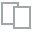
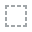
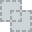
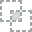
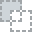
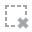
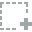
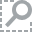
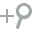
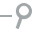
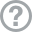
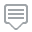
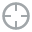
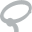
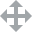
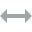
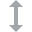
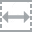
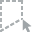
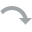
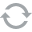
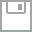
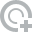
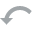
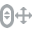
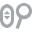
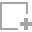
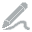
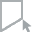
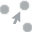
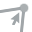
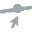

In [364]:
plot(df_original_results[['LIKES','mean_likes','log_LIKES',\
                          'y_test_pred_log','y_test_pred']],"")

In [365]:
df_original_results[['LIKES','mean_likes','log_LIKES','y_test_pred_log','y_test_pred']].sample(2)

Series1 = df_original_results.LIKES
Series2= df_original_results.mean_likes
series3 = df_original_results.y_test_pred
series4 = series3 - Series1 # diff perd and real
series5 = series3 - Series2 # diff perd and mean 
series8 = Series2 - Series1 # diff mean and real
series6 = (series3 / Series1 *100) -100
series7 = (Series1 / df_original_results.mean_likes *100) - 100
series9 = (Series2 / Series1 *100) - 100
res = round(pd.DataFrame({'real_like': Series1, 'like_predication': series3, \
                          'mean likes':Series2, \
                     'diff between like_predication and real_like': series4, \
                     'diff between like_predication and mean like': series5
                     
                     ,'diff between like_mean and real like': series8 \
                      ,'% diff between like_predication and real_like': series6, \
                      '% diff between like_predication and mean like': series7 \
                      ,'% diff between like_mean and real like': series9 #\
                     #, 'mean_-1_same_0_perd_1':  abs(series6) - abs(series9)
                     }                   ))


res['mean_-1_same_0_perd_1'] =  res.apply(lambda row: what_is_better(row['% diff between like_predication and mean like'],10), axis=1)

In [366]:
res.sample(6)

real_like  like_predication  mean likes  \
LINE_NUM_INDEX                                            
4370                395.0             449.0       427.0   
19656               249.0              68.0       193.0   
30099               327.0             850.0       383.0   
26775               305.0             465.0       422.0   
18385               283.0             207.0       328.0   
6741                 43.0              58.0        27.0   

                diff between like_predication and real_like  \
LINE_NUM_INDEX                                                
4370                                                   54.0   
19656                                                -181.0   
30099                                                 523.0   
26775                                                 160.0   
18385                                                 -76.0   
6741                                                   15.0   

                diff between like_predication and mean like  \
LINE_NUM_INDEX                                                
4370                                                   21.0   
19656                                                -125.0   
30099                                                 468.0   
26775                                                  43.0   
18385                                                -121.0   
6741                                                   31.0   

                diff between like_mean and real like  \
LINE_NUM_INDEX                                         
4370                                            32.0   
19656                                          -56.0   
30099                                           56.0   
26775                                          117.0   
18385                                           45.0   
6741                                           -16.0   

                % diff between like_predication and real_like  \
LINE_NUM_INDEX                                                  
4370                                                     14.0   
19656                                                   -73.0   
30099                                                   160.0   
26775                                                    52.0   
18385                                                   -27.0   
6741                                                     35.0   

                % diff between like_predication and mean like  \
LINE_NUM_INDEX                                                  
4370                                                     -8.0   
19656                                                    29.0   
30099                                                   -15.0   
26775                                                   -28.0   
18385                                                   -14.0   
6741                                                     60.0   

                % diff between like_mean and real like  mean_-1_same_0_perd_1  
LINE_NUM_INDEX                                                                 
4370                                               8.0                    0.0  
19656                                            -22.0                    1.0  
30099                                             17.0                   -1.0  
26775                                             38.0                   -1.0  
18385                                             16.0                   -1.0  
6741                                             -37.0                    1.0

In [367]:
res['mean_-1_same_0_perd_1'].median()
res['mean_-1_same_0_perd_1'].mean()

-0.011226494527083918


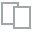
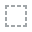
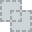
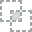
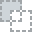
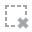
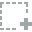
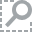
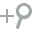
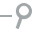
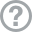
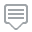
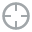
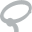
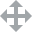
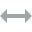
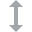
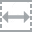
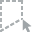
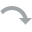
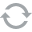
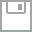
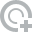
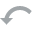
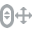
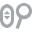
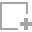
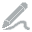
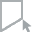
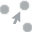
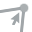
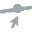

In [368]:
plot(res, "diff between like_predication and mean like")


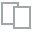
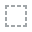
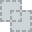
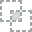
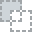
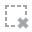
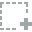
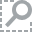
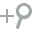
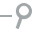
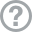
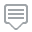
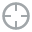
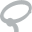
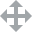
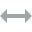
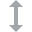
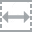
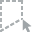
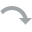
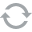
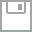
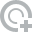
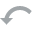
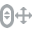
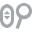
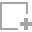
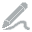
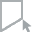
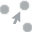
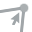
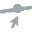

In [369]:
plot(res, "diff between like_predication and real_like")

In [370]:
#spaCy, NLTK, Stanford NLP

Eladk End 2021-Oct-28

In [371]:
# Series1 = 10**X_test_copy.y_test_pred
# #Series2= X_test.mean_likes
# #X_test_mean_likes
# series3 = 10**y_test
# series4 = series3 - Series1
# series5 = Series1 - Series2 #X_test_mean_likes
# # series6 = series3 / Series1 *100
# # series7 = Series1 / X_test_mean_likes *100
# res = round(pd.DataFrame({'like_predication': Series1,\ #'mean_likes': X_test_mean_likes \
#                      'real_like': series3, \
#                     'diff between like_predication and real_like': series4, \
#                     'diff between like_predication and mean like': series5
#                     # ,'% diff between like_predication and real_like': series6, \
#                     # '% diff between like_predication and mean like': series7
#                     }                   ))

In [372]:
# res.sample(10)

In [373]:
# #boston = load_boston()
# sorted_idx = XGB_reg_likes.feature_importances_.argsort()
# #plt.barh
# df_feature_importances = pd.DataFrame(XGB_reg_likes.feature_importances_[sorted_idx])
# df_feature_importances_headers = pd.DataFrame(X.columns[sorted_idx])
# #plt.xlabel("Xgboost Feature Importance")

XGBoost feature Importances

In [374]:
sorted_idx = XGB_reg_likes.feature_importances_.argsort()
pd.DataFrame(XGB_reg_likes.feature_importances_[sorted_idx], 
             index=list(X.columns[sorted_idx]),
             columns=["Feature_Value"]).sort_values(by="Feature_Value",ascending=False).head(20)

Feature_Value
FOLLOWER                                        0.472049
HUMAN                                           0.088194
DATA_SOURCE_OBJECT_AS_INT                       0.046915
CITY_after_trgt_encdr                           0.046591
ACCESSIBILITY_CAPTION_after_trgt_encdr          0.038269
LOCATION_after_trgt_encdr                       0.037187
CAPTION_after_trgt_encdr                        0.029046
POSTER                                          0.016860
ACCESSIBILITY_CAPTION_OBJECT_AS_INT             0.014818
NUMBER_OF_AT_IN_ACCESSIBILITY_CAPTION           0.012950
YEAR                                            0.011597
APPAREL                                         0.010692
SWIMWEAR                                        0.009604
IMAGE_LABELS_after_trgt_encdr                   0.009602
IMAGE_LABELS_OBJECT_AS_INT                      0.009376
NUMBER_OF_WORDS_IN_CAPTION                      0.009352
count_of_posts_by_username                      0.009256
MONTH                                           0.009186
NUMBER_OF_WORDS_IN_ACCESSIBILITY_CAPTIONN       0.008961
CAPTION_INTEREST_after_trgt_encdr               0.008536

# Pipeline 6 Evaluate the Model Results

Eladk 2022-Mar-04

In [375]:
#results_and_data_analysis =  'https://raw.githubusercontent.com/Raanank10/Instagram-s-influencers/main/results_and_data_analysis_for_download.csv'

#results_and_data_analysis = pd.read_csv(results_and_data_analysis, index_col=0)

# concat res and original:

results_and_data_analysis = pd.concat([res,df_original_results
                                       #df_original, X_test_result,df_image_style
                                       ], axis=1, join="inner")

In [376]:
res.head()

real_like  like_predication  mean likes  \
LINE_NUM_INDEX                                            
2                    46.0              79.0        52.0   
3                    50.0              99.0        41.0   
11                   42.0             112.0        41.0   
15                    9.0              33.0         6.0   
18                  214.0              57.0       229.0   

                diff between like_predication and real_like  \
LINE_NUM_INDEX                                                
2                                                      33.0   
3                                                      49.0   
11                                                     70.0   
15                                                     24.0   
18                                                   -157.0   

                diff between like_predication and mean like  \
LINE_NUM_INDEX                                                
2                                                      27.0   
3                                                      59.0   
11                                                     71.0   
15                                                     28.0   
18                                                   -172.0   

                diff between like_mean and real like  \
LINE_NUM_INDEX                                         
2                                                6.0   
3                                               -9.0   
11                                              -1.0   
15                                              -4.0   
18                                              15.0   

                % diff between like_predication and real_like  \
LINE_NUM_INDEX                                                  
2                                                        71.0   
3                                                        99.0   
11                                                      166.0   
15                                                      268.0   
18                                                      -73.0   

                % diff between like_predication and mean like  \
LINE_NUM_INDEX                                                  
2                                                       -11.0   
3                                                        23.0   
11                                                        3.0   
15                                                       64.0   
18                                                       -7.0   

                % diff between like_mean and real like  mean_-1_same_0_perd_1  
LINE_NUM_INDEX                                                                 
2                                                 12.0                   -1.0  
3                                                -19.0                    1.0  
11                                                -3.0                    0.0  
15                                               -39.0                    1.0  
18                                                 7.0                    0.0

In [377]:
from scipy import stats

In [378]:
#remove outliers
#results_and_data_analysis_no_outliers = (
# results_and_data_analysis[['like_predication','real_like']][(np.abs(stats.zscore(results_and_data_analysis[['like_predication','real_like']])) < 3).all(axis=1)].index
#)

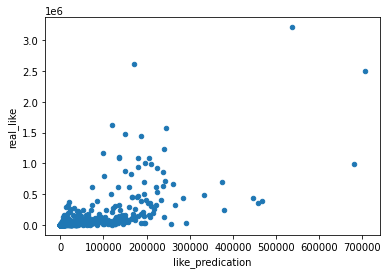

In [379]:
res.plot.scatter(x='like_predication',
                       y='real_like',
                       #c='DarkBlue'
)

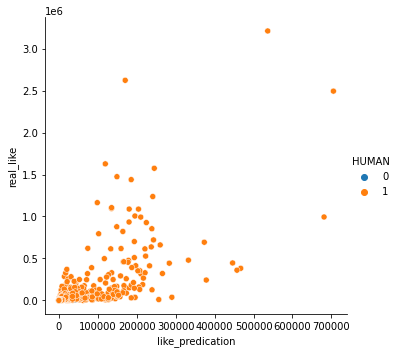

In [380]:
sns.relplot(data=results_and_data_analysis, x='like_predication', y='real_like'
, hue='HUMAN'
#, hue='SWIMWEAR'
#, hue='UNDERWEAR'
#, hue='CITY_after_trgt_encdr'
#, hue='CITY_after_trgt_encdr'
#, hue_order='HEMAN',aspect=1.61
)
plt.show()

In [381]:
results_and_data_analysis

real_like  like_predication  mean likes  \
LINE_NUM_INDEX                                            
2                    46.0              79.0        52.0   
3                    50.0              99.0        41.0   
11                   42.0             112.0        41.0   
15                    9.0              33.0         6.0   
18                  214.0              57.0       229.0   
...                   ...               ...         ...   
38743                78.0             237.0       159.0   
38758                61.0              86.0        85.0   
38761                33.0              31.0        40.0   
38762                76.0              88.0        85.0   
38763               113.0             134.0        85.0   

                diff between like_predication and real_like  \
LINE_NUM_INDEX                                                
2                                                      33.0   
3                                                      49.0   
11                                                     70.0   
15                                                     24.0   
18                                                   -157.0   
...                                                     ...   
38743                                                 159.0   
38758                                                  25.0   
38761                                                  -2.0   
38762                                                  12.0   
38763                                                  21.0   

                diff between like_predication and mean like  \
LINE_NUM_INDEX                                                
2                                                      27.0   
3                                                      59.0   
11                                                     71.0   
15                                                     28.0   
18                                                   -172.0   
...                                                     ...   
38743                                                  79.0   
38758                                                   1.0   
38761                                                  -9.0   
38762                                                   3.0   
38763                                                  49.0   

                diff between like_mean and real like  \
LINE_NUM_INDEX                                         
2                                                6.0   
3                                               -9.0   
11                                              -1.0   
15                                              -4.0   
18                                              15.0   
...                                              ...   
38743                                           81.0   
38758                                           24.0   
38761                                            7.0   
38762                                            9.0   
38763                                          -28.0   

                % diff between like_predication and real_like  \
LINE_NUM_INDEX                                                  
2                                                        71.0   
3                                                        99.0   
11                                                      166.0   
15                                                      268.0   
18                                                      -73.0   
...                                                       ...   
38743                                                   204.0   
38758                                                    41.0   
38761                                                    -7.0   
38762                                                    16.0   
38763                                                    18.0   

                % diff between li

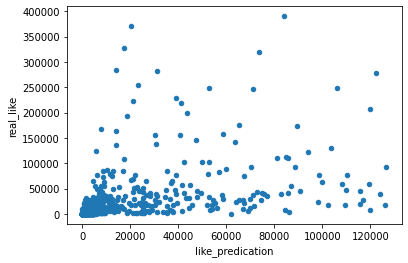

In [382]:
res[['like_predication','real_like','mean_-1_same_0_perd_1']][(np.abs(stats.zscore(res[['like_predication','real_like']])) < 3).all(axis=1)].plot.scatter(x='like_predication',
                       y='real_like',
                       #c='mean_-1_same_0_perd_1'
)

In [383]:
#df['Late_In_Days'] = 
#results_and_data_analysis.apply(lambda row: what_is_better(row['% diff between like_predication and mean like'],10), axis=1)

In [384]:
results_and_data_analysis['mean_-1_same_0_perd_1'].value_counts()

-1.0    1441
 1.0    1401
 0.0     721
Name: mean_-1_same_0_perd_1, dtype: int64

In [385]:
table = pd.pivot_table(results_and_data_analysis, 
                       values='% diff between like_predication and mean like',
                       index=['HUMAN'],
                       columns=['mean_-1_same_0_perd_1'], 
                       #aggfunc=np.mean
                       aggfunc='count'
                       )

table

mean_-1_same_0_perd_1  -1.0   0.0   1.0
HUMAN                                  
0                       148    37    78
1                      1293   684  1323

In [386]:
table = pd.pivot_table(results_and_data_analysis[results_and_data_analysis['CITY'].notnull()], 
                       values='% diff between like_predication and mean like',
                       index=['CITY'],
                       columns=['mean_-1_same_0_perd_1'], 
                       #aggfunc=np.sum
                       aggfunc='count'
                       )

table

mean_-1_same_0_perd_1                   -1.0   0.0   1.0
CITY                                                    
059 40 Liptovská Teplicka, Slovakia      NaN   1.0   1.0
07609 Puigderrós, Illes Balears, Spain   NaN   NaN   1.0
12560 Benicàssim, Castellón, Spain       NaN   1.0   NaN
2710 Sintra, Portugal                    NaN   NaN   1.0
39000 Brinchang, Pahang, Malaysia        NaN   NaN   1.0
...                                      ...   ...   ...
Yerevan, Armenia                         1.0   NaN   NaN
Yonkers, NY, USA                         NaN   1.0   NaN
Yukon, OK, USA                           1.0   1.0   NaN
Zürich, Switzerland                      NaN   NaN   1.0
na                                      38.0  15.0  24.0

[626 rows x 3 columns]

In [387]:
# results_and_data_analysis.sort_values(['job','count'],ascending=False).groupby('job').head(3)

In [388]:
results_and_data_analysis_by = results_and_data_analysis.groupby(['HUMAN','mean_-1_same_0_perd_1'])\
                                       .agg(
                                            NUM_OF_LIKES=('mean_-1_same_0_perd_1','count')#,
                                            # Average_OF_LIKES=('LIKES','mean'),
                                            # median_OF_LIKES=('LIKES','median')
                                            )

# per_DAYOFWEEK["NUM_OF_LIKES_IN_THOUSANDS"] = per_DAYOFWEEK['NUM_OF_LIKES']/1000
# per_DAYOFWEEK.plot(y=["NUM_OF_LIKES_IN_THOUSANDS",
#                       "Average_OF_LIKES","median_OF_LIKES"], kind="bar",figsize=(12,8))
# per_DAYOFWEEK

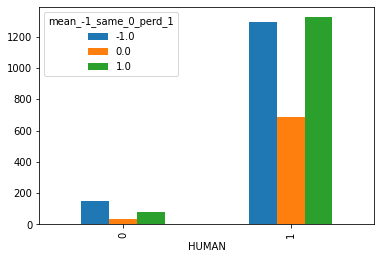

In [470]:
results_and_data_analysis.groupby(['HUMAN','mean_-1_same_0_perd_1']).size().unstack().plot.bar()
#df.groupby(['col1','col2']).size()

# Pipeline 7 Explain and Understanding the model (SHAP)

In [390]:
!pip install shap
import shap
shap.initjs()

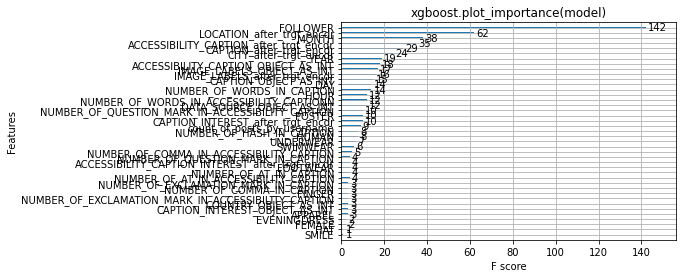

In [391]:
xgb.plot_importance(XGB_reg_likes)
plt.title("xgboost.plot_importance(model)")
plt.show()

In [392]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(XGB_reg_likes)
shap_values = explainer(X)

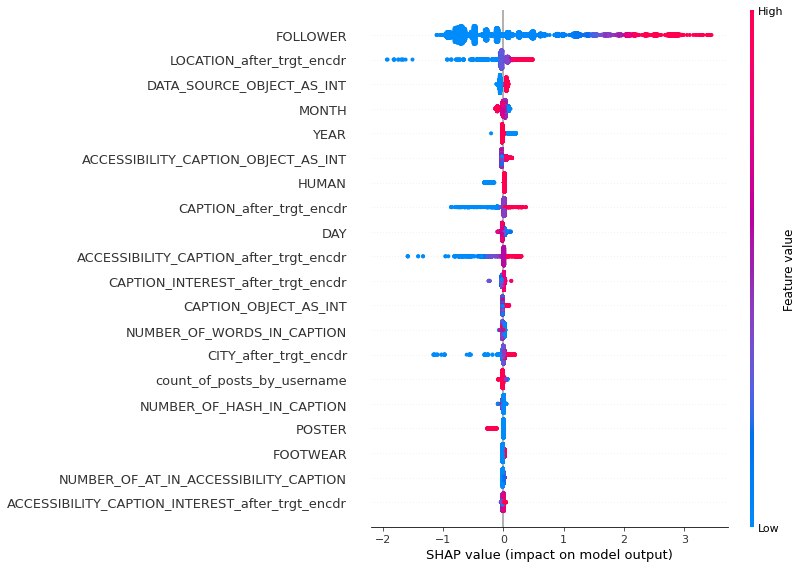

In [393]:
shap.summary_plot(shap_values, X)

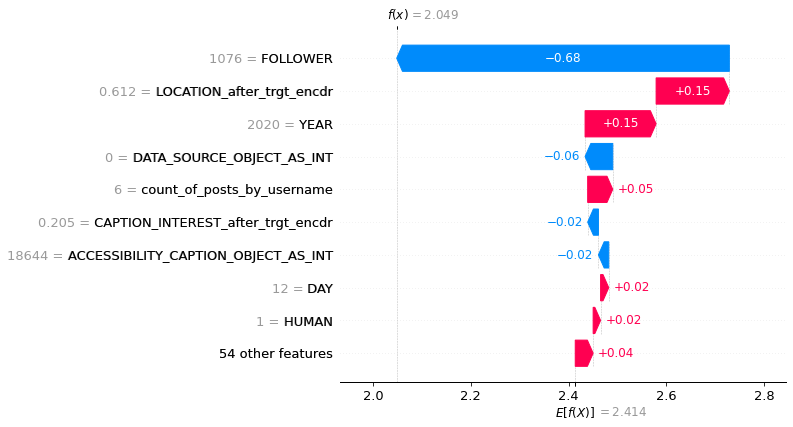

In [394]:
# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[5])

In [395]:
#shap.dependence_plot("SWIMWEAR", shap_values, X)

In [396]:
#shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:])

In [397]:
# visualize the first prediction's explanation with a force plot
shap.plots.force(shap_values[0])

In [398]:
# visualize all the training set predictions
#shap.plots.force(shap_values)

# Appendix - Data Visualization

In [399]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38766 entries, 0 to 38765
Data columns (total 88 columns):
 #   Column                                               Non-Null Count  Dtype         
---  ------                                               --------------  -----         
 0   FOLLOWER                                             38766 non-null  float64       
 1   LIKES                                                38766 non-null  float64       
 2   COMMENTS                                             38766 non-null  float64       
 3   ENGAGEMENT                                           38766 non-null  float64       
 4   ACCESSIBILITY_CAPTION                                38766 non-null  object        
 5   CAPTION                                              38766 non-null  object        
 6   LOCATION                                             38766 non-null  object        
 7   CITY                                                 38766 non-null  object        
 

In [400]:
results_and_data_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3599 entries, 2 to 38763
Columns: 110 entries, real_like to y_test_pred
dtypes: category(3), datetime64[ns](1), float32(3), float64(39), int64(45), object(19)
memory usage: 2.9+ MB


In [401]:
results_and_data_analysis.sample(2)

real_like  like_predication  mean likes  \
LINE_NUM_INDEX                                            
22103                47.0              40.0        68.0   
32840               550.0             135.0       559.0   

                diff between like_predication and real_like  \
LINE_NUM_INDEX                                                
22103                                                  -7.0   
32840                                                -415.0   

                diff between like_predication and mean like  \
LINE_NUM_INDEX                                                
22103                                                 -29.0   
32840                                                -423.0   

                diff between like_mean and real like  \
LINE_NUM_INDEX                                         
22103                                           22.0   
32840                                            9.0   

                % diff between like_predication and real_like  \
LINE_NUM_INDEX                                                  
22103                                                   -15.0   
32840                                                   -75.0   

                % diff between like_predication and mean like  \
LINE_NUM_INDEX                                                  
22103                                                   -31.0   
32840                                                    -2.0   

                % diff between like_mean and real like  mean_-1_same_0_perd_1  \
LINE_NUM_INDEX                                                                  
22103                                             46.0                   -1.0   
32840                                              2.0                    0.0   

                ... log_LIKES  log_COMMENTS            DATETIME  LIKES_RANK  \
LINE_NUM_INDEX  ...                                                           
22103           ...  1.672099      0.602071 2019-09-29 13:36:40        High   
32840           ...  2.740363     -4.000000 2021-10-26 04:55:15   Very High   

                COMMENTS_RANK ENGAGEMENT_RANK LIKES_RANK_INT  \
LINE_NUM_INDEX                                                 
22103                    High       Very High              2   
32840                     Low       Very High              3   

               COMMENTS_RANK_INT ENGAGEMENT_RANK_INT y_test_pred  
LINE_NUM_INDEX                                                    
22103                          2                   3   39.952450  
32840                          0                   3  135.440536  

[2 rows x 110 columns]

In [402]:
results_and_data_analysis.groupby('USERNAME').size().mean() # 1.78
results_and_data_analysis.groupby('USERNAME').size().median() # 1

1.0

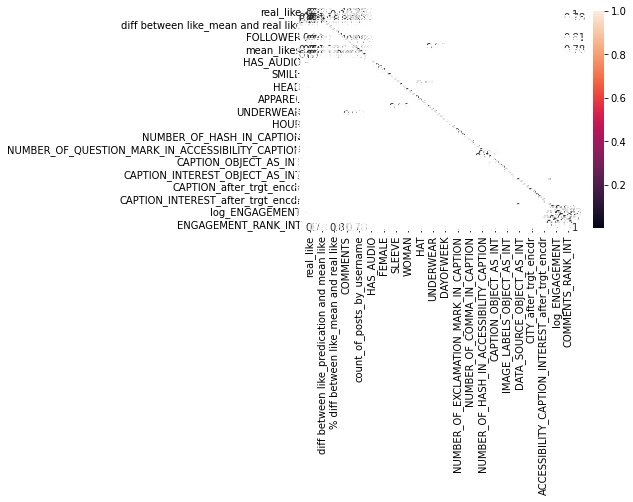

In [403]:
sns.heatmap(results_and_data_analysis.corr().abs(), annot=True, linewidths = 4, 
            #linecolor = "white"
            )

In [404]:
# results_and_data_analysis.to_csv('results_and_data_analysis_for_download.csv') 
# files.download('results_and_data_analysis_for_download.csv')

# results_and_data_analysis.to_csv('data_output_PL6_results_and_data.csv') 
# files.download('data_output_PL6_results_and_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

63
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755

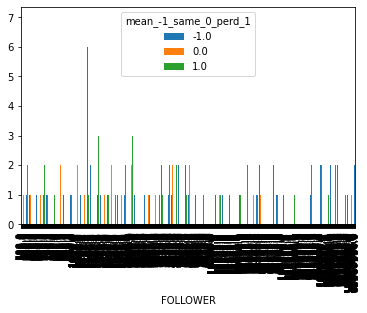

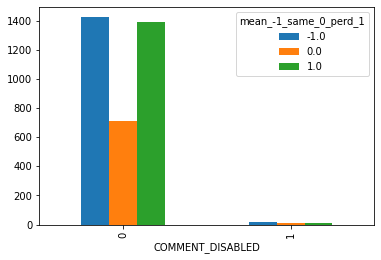

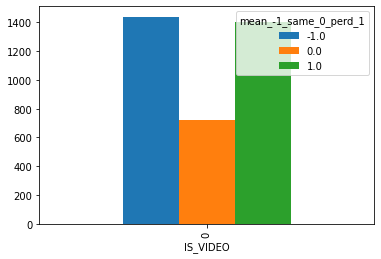

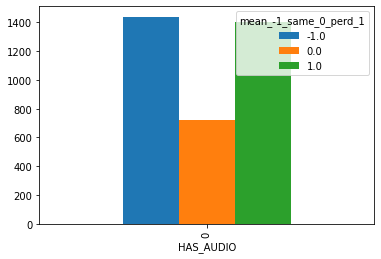

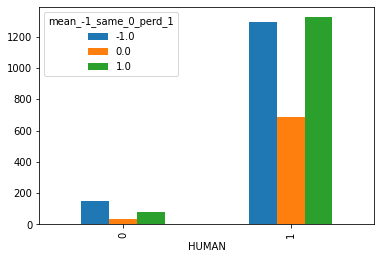

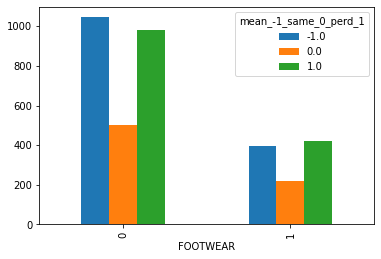

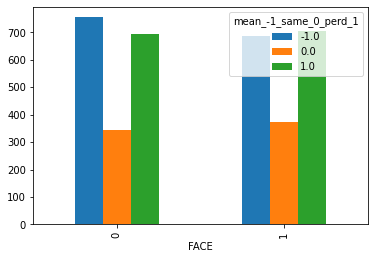

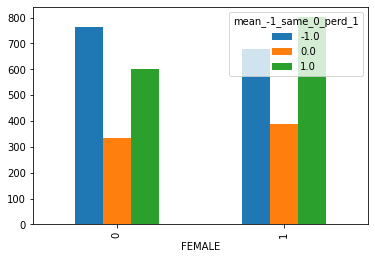

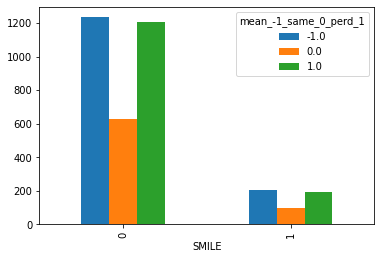

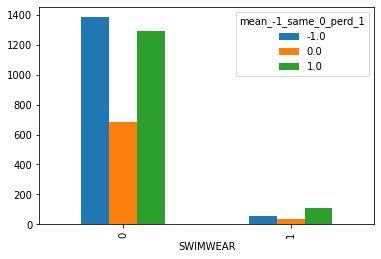

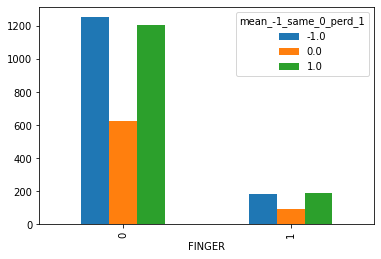

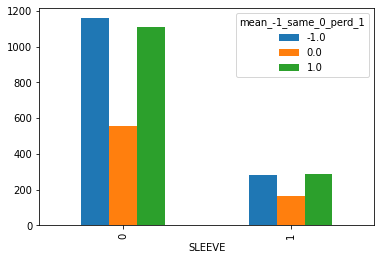

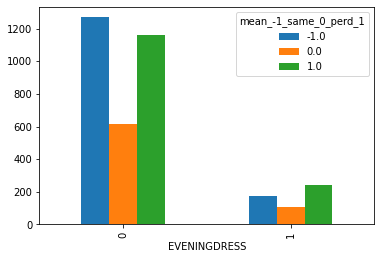

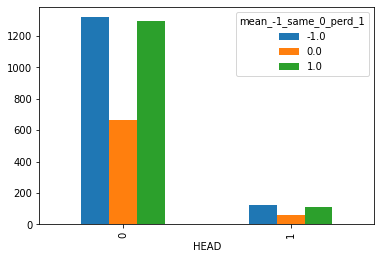

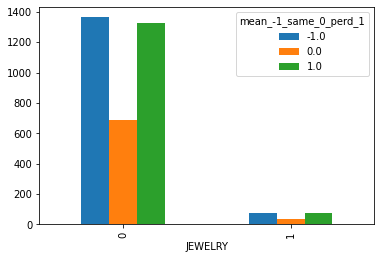

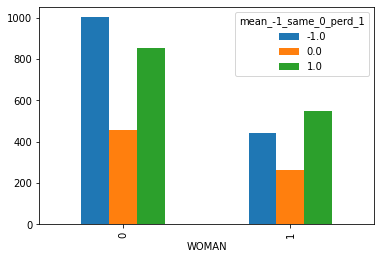

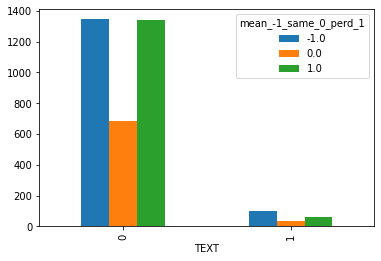

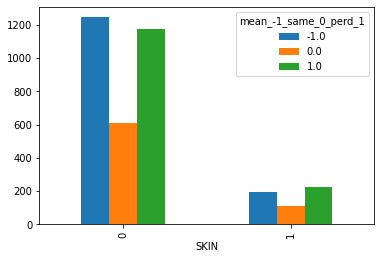

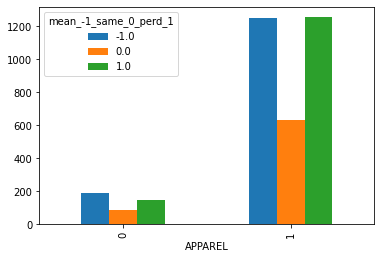

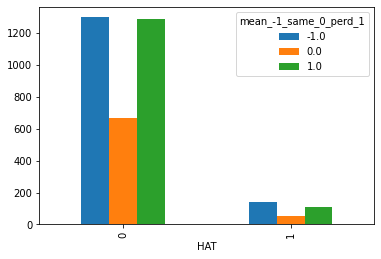

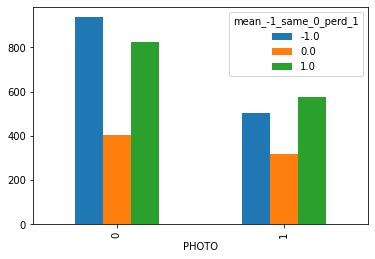

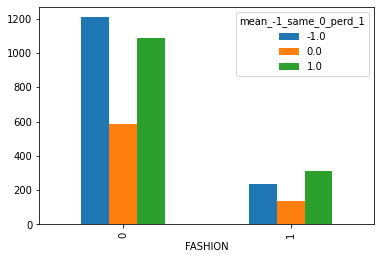

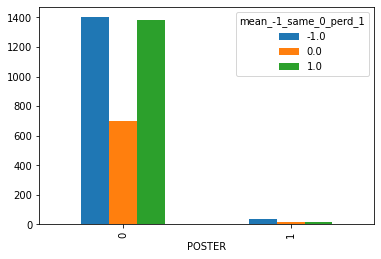

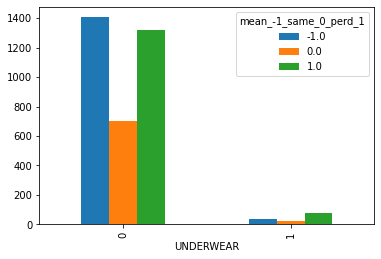

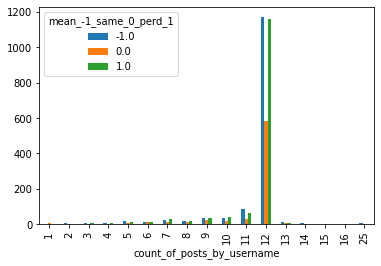

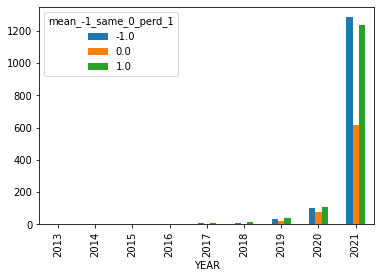

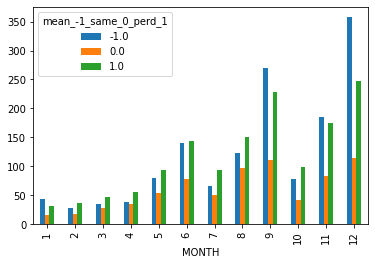

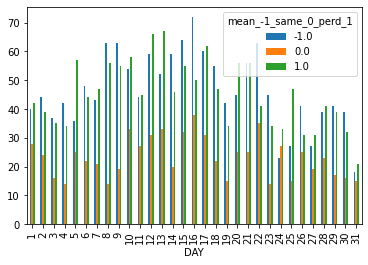

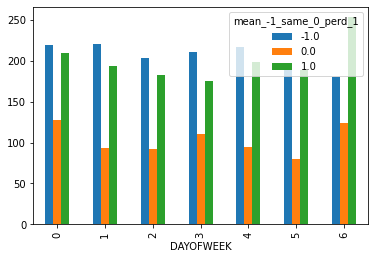

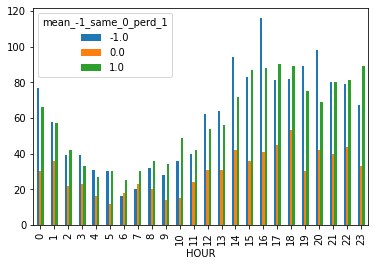

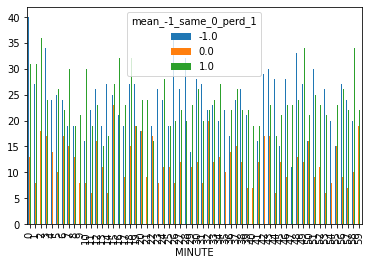

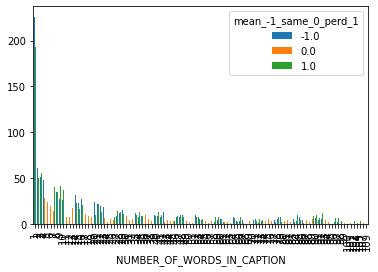

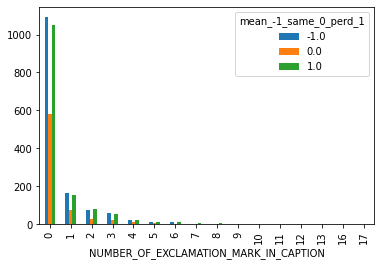

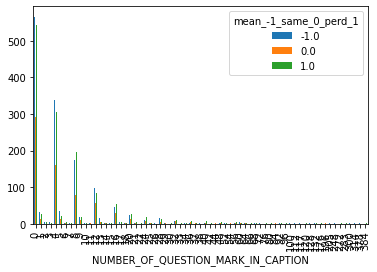

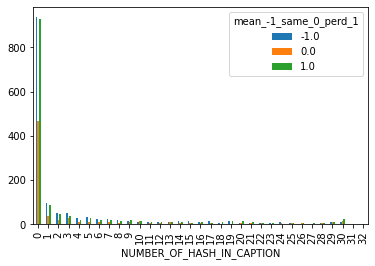

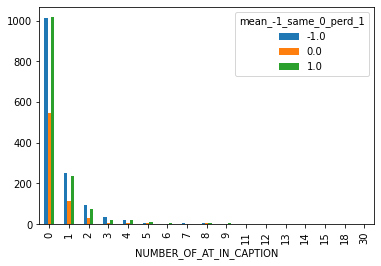

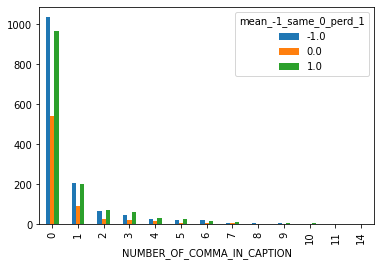

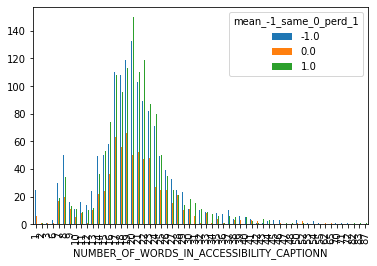

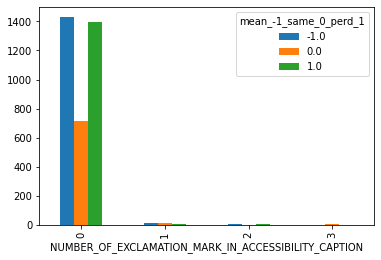

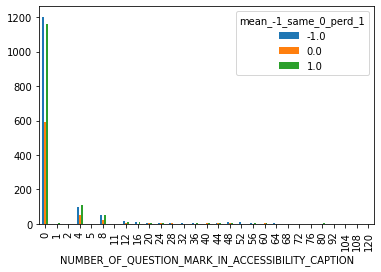

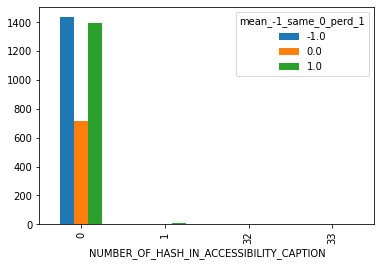

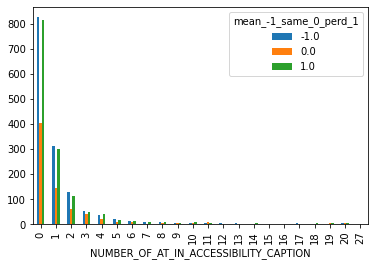

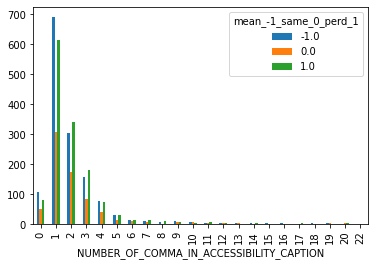

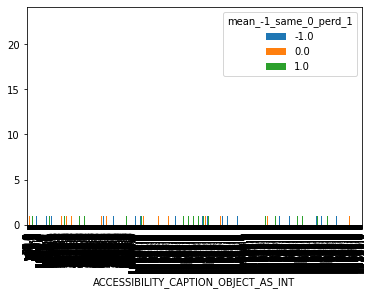

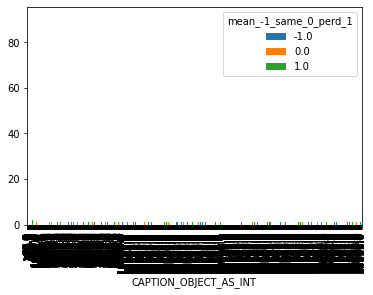

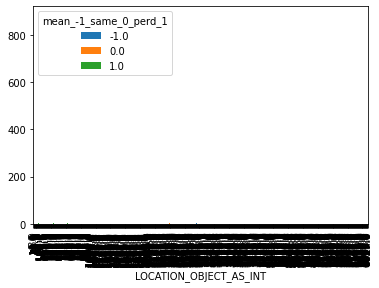

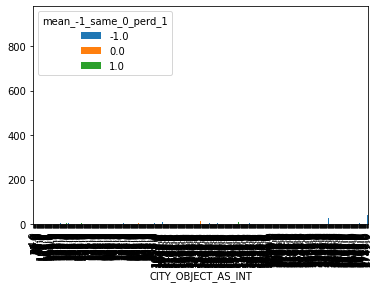

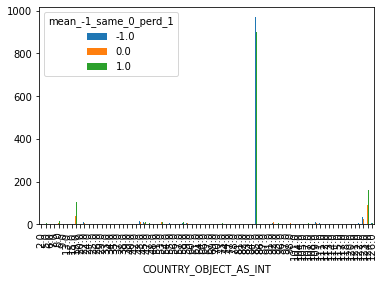

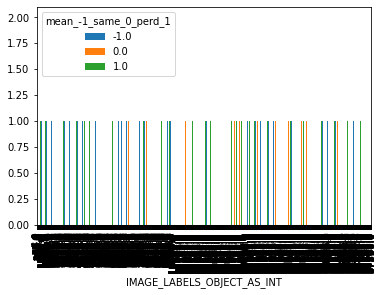

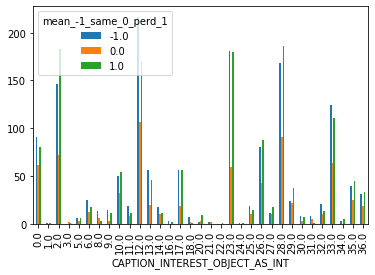

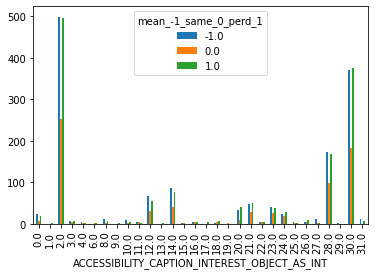

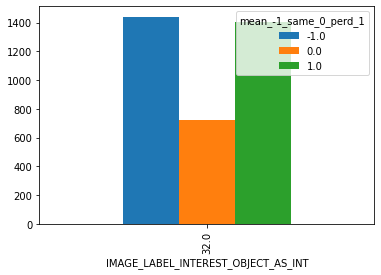

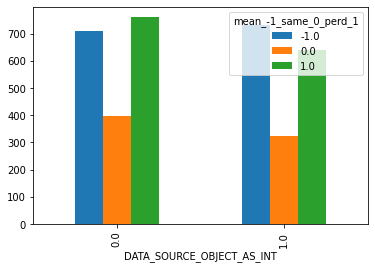

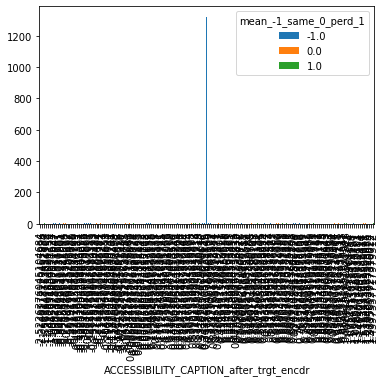

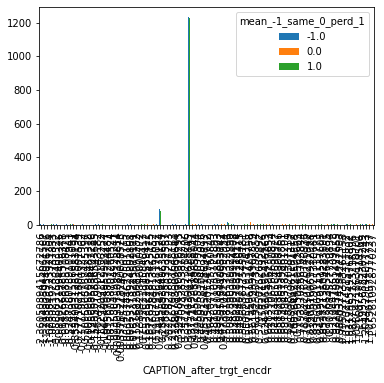

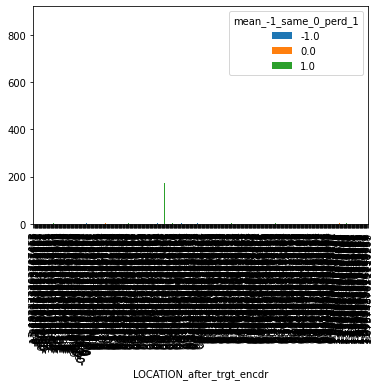

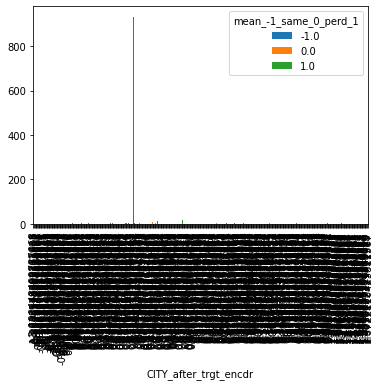

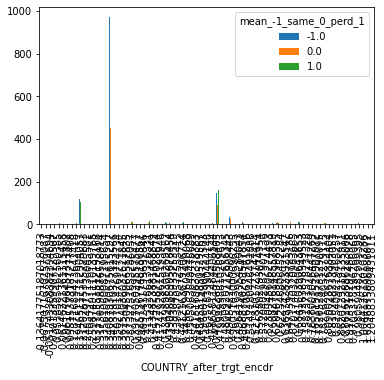

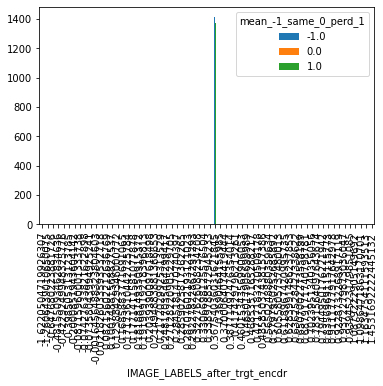

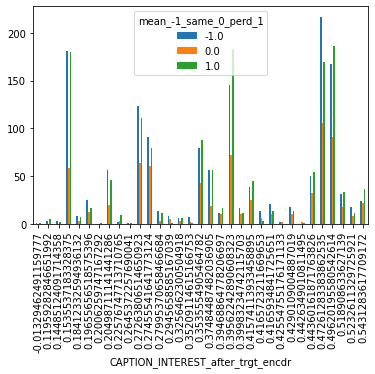

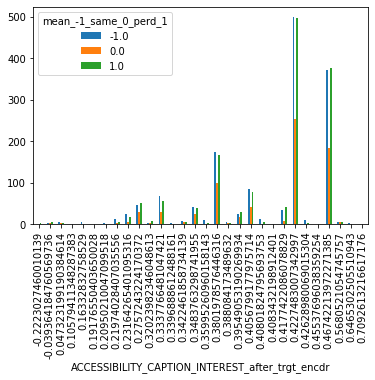

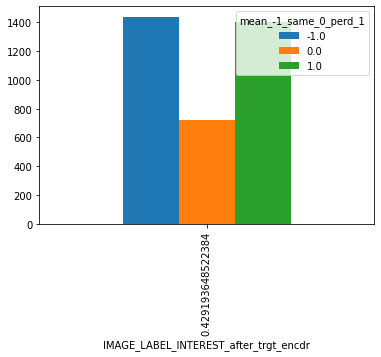

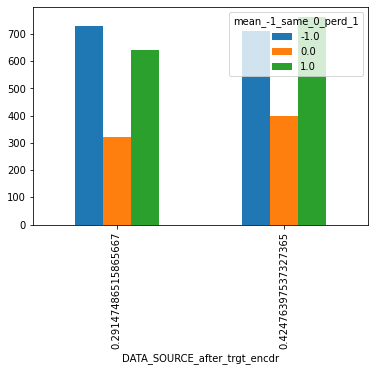

In [496]:
column_list = X.loc[:,~X.columns.duplicated()].columns
print(len(column_list)) # 63

for col in column_list:
  chart = results_and_data_analysis.groupby([col,'mean_-1_same_0_perd_1']) #.size().unstack().plot.bar()

  print(chart.size().unstack().plot.bar())